# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

### Генерация данных

In [12]:
blobs = datasets.make_blobs(centers=2, cluster_std=5.5, random_state=1)

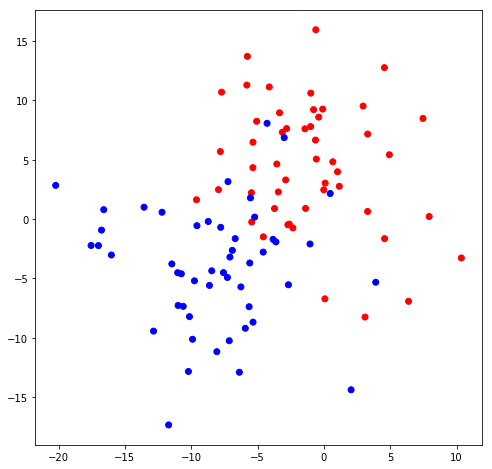

In [13]:
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors);

In [16]:
train_data, test_data, train_labels, test_labels = train_test_split(blobs[0], blobs[1], 
                                                                    test_size=0.3,
                                                                    random_state=1)

### Линейная классификация

#### RidgeClassifier

In [18]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [19]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001)

In [20]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [22]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [23]:
print(ridge_predictions)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [24]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [25]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [26]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [30]:
log_regressor = linear_model.LogisticRegression(random_state=1, solver='lbfgs')

In [31]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr_predictions = log_regressor.predict(test_data)

In [33]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [39]:
test_labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [40]:
lr_predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [41]:
print(lr_proba_predictions)

[[9.99254667e-01 7.45333217e-04]
 [4.08279523e-01 5.91720477e-01]
 [4.90541791e-01 5.09458209e-01]
 [3.78296027e-03 9.96217040e-01]
 [7.32221196e-01 2.67778804e-01]
 [2.44262899e-01 7.55737101e-01]
 [9.93761113e-01 6.23888724e-03]
 [9.78405579e-01 2.15944205e-02]
 [9.55344987e-01 4.46550128e-02]
 [1.68318566e-01 8.31681434e-01]
 [9.20548027e-01 7.94519726e-02]
 [8.49635842e-03 9.91503642e-01]
 [8.42172474e-01 1.57827526e-01]
 [4.78103481e-02 9.52189652e-01]
 [4.16878377e-03 9.95831216e-01]
 [7.76668489e-04 9.99223332e-01]
 [2.05937909e-01 7.94062091e-01]
 [9.31195721e-01 6.88042793e-02]
 [2.41180236e-01 7.58819764e-01]
 [8.27655095e-04 9.99172345e-01]
 [8.91142562e-02 9.10885744e-01]
 [9.95944524e-01 4.05547579e-03]
 [9.84077857e-01 1.59221428e-02]
 [3.02681109e-01 6.97318891e-01]
 [1.47440544e-03 9.98525595e-01]
 [7.78506108e-03 9.92214939e-01]
 [2.89544877e-01 7.10455123e-01]
 [8.84591004e-01 1.15408996e-01]
 [9.92724199e-01 7.27580141e-03]
 [3.34985738e-03 9.96650143e-01]]


In [42]:
metrics.accuracy_score(test_labels, lr_predictions)

0.8

In [43]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

### Оценка качества по cross-validation

#### cross_val_score

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
ridge_scoring = cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [49]:
lr_scoring = cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [50]:
lr_scoring

array([0.8, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [51]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


In [52]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348


#### cross_val_score с заданными scorer и cv_strategy

In [62]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [63]:
from sklearn.model_selection import StratifiedShuffleSplit

In [73]:
cv_strategy = StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=2)

In [75]:
ridge_scoring = cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [76]:
lr_scoring = cross_val_score(log_regressor, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [77]:
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.059535236998305825


In [78]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Log mean:0.8700000000000001, max:1.0, min:0.7666666666666667, std:0.06137317546507322
